In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torchvision as tv
from PIL import Image
import glob
import os
from tqdm import tqdm
import cv2

In [43]:
torch.cuda.is_available()
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [44]:
path='./data/kaggle_3m/data.csv'
data=pd.read_csv(path)

In [45]:
data

,Patient,RNASeqCluster,MethylationCluster,miRNACluster,CNCluster,RPPACluster,OncosignCluster,COCCluster,histological_type,neoplasm_histologic_grade,tumor_tissue_site,laterality,tumor_location,gender,age_at_initial_pathologic,race,ethnicity,death01
0,TCGA_CS_4941,2.0,4.0,2,2.0,NaN,3.0,2,1.0,2.0,1.0,3.0,2.0,2.0,67.0,3.0,2.0,1.0
1,TCGA_CS_4942,1.0,5.0,2,1.0,1.0,2.0,1,1.0,2.0,1.0,3.0,2.0,1.0,44.0,2.0,NaN,1.0
2,TCGA_CS_4943,1.0,5.0,2,1.0,2.0,2.0,1,1.0,2.0,1.0,1.0,2.0,2.0,37.0,3.0,NaN,0.0
3,TCGA_CS_4944,NaN,5.0,2,1.0,2.0,1.0,1,1.0,1.0,1.0,3.0,6.0,2.0,50.0,3.0,NaN,0.0
4,TCGA_CS_5393,4.0,5.0,2,1.0,2.0,3.0,1,1.0,2.0,1.0,1.0,6.0,2.0,39.0,3.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,TCGA_HT_8563,2.0,5.0,3,1.0,NaN,2.0,2,1.0,2.0,1.0,3.0,2.0,1.0,30.0,3.0,2.0,0.0
106,TCGA_HT_A5RC,2.0,4.0,2,2.0,NaN,3.0,2,1.0,2.0,1.0,1.0,2.0,1.0,70.0,3.0,2.0,1.0
107,TCGA_HT_A616,NaN,5.0,2,1.0,NaN,2.0,1,1.0,1.0,1.0,1.0,2.0,1.0,36.0,3.0,2.0,0.0
108,TCGA_HT_A61A,NaN,5.0,2,NaN,NaN,NaN,1,3.0,1.0,1.0,1.0,6.0,1.0,20.0,3.0,2.0,0.0


In [46]:
path='./data/kaggle_3m/'
img_path=pd.DataFrame({'patient':[],'x':[],'y':[]})

for sub_dir in glob.glob(path+'*'):
    
    try:
        for filename in os.listdir(sub_dir):
            if(not filename.__contains__('mask')):
                img_path.loc[len(img_path.index)]=[sub_dir.split('\\')[-1],sub_dir+'/'+filename,sub_dir+'/'+filename.replace('.tif','_mask.tif')]
            
    except:
        print(sub_dir)

img_path

./data/kaggle_3m\data.csv
./data/kaggle_3m\README.md


,patient,x,y
0,TCGA_CS_4941_19960909,./data/kaggle_3m\TCGA_CS_4941_19960909/TCGA_CS...,./data/kaggle_3m\TCGA_CS_4941_19960909/TCGA_CS...
1,TCGA_CS_4941_19960909,./data/kaggle_3m\TCGA_CS_4941_19960909/TCGA_CS...,./data/kaggle_3m\TCGA_CS_4941_19960909/TCGA_CS...
2,TCGA_CS_4941_19960909,./data/kaggle_3m\TCGA_CS_4941_19960909/TCGA_CS...,./data/kaggle_3m\TCGA_CS_4941_19960909/TCGA_CS...
3,TCGA_CS_4941_19960909,./data/kaggle_3m\TCGA_CS_4941_19960909/TCGA_CS...,./data/kaggle_3m\TCGA_CS_4941_19960909/TCGA_CS...
4,TCGA_CS_4941_19960909,./data/kaggle_3m\TCGA_CS_4941_19960909/TCGA_CS...,./data/kaggle_3m\TCGA_CS_4941_19960909/TCGA_CS...
...,...,...,...
3924,TCGA_HT_A61B_19991127,./data/kaggle_3m\TCGA_HT_A61B_19991127/TCGA_HT...,./data/kaggle_3m\TCGA_HT_A61B_19991127/TCGA_HT...
3925,TCGA_HT_A61B_19991127,./data/kaggle_3m\TCGA_HT_A61B_19991127/TCGA_HT...,./data/kaggle_3m\TCGA_HT_A61B_19991127/TCGA_HT...
3926,TCGA_HT_A61B_19991127,./data/kaggle_3m\TCGA_HT_A61B_19991127/TCGA_HT...,./data/kaggle_3m\TCGA_HT_A61B_19991127/TCGA_HT...
3927,TCGA_HT_A61B_19991127,./data/kaggle_3m\TCGA_HT_A61B_19991127/TCGA_HT...,./data/kaggle_3m\TCGA_HT_A61B_19991127/TCGA_HT...


In [47]:
transforms= tv.transforms.Compose([tv.transforms.ToTensor()])


In [48]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self,path_df,transforms=None):
        self.data=path_df
        self.transforms=transforms
    def __len__(self):
        return len(self.data['patient'])
    
    def __getitem__(self,idx):
        x=Image.open(self.data['x'][idx])
        y=Image.open(self.data['y'][idx])
        #return x,y
       
        
        if self.transforms:
            return self.transforms(x), self.transforms(y)
        else:
            return x,y
        

In [49]:
countOfRows=img_path.shape[0]
trainData=img_path[countOfRows//10:countOfRows].reset_index(drop=True)
testData=img_path[0:countOfRows//10].reset_index(drop=True)
trainData['y']


0       ./data/kaggle_3m\TCGA_DU_5849_19950405/TCGA_DU...
1       ./data/kaggle_3m\TCGA_DU_5849_19950405/TCGA_DU...
2       ./data/kaggle_3m\TCGA_DU_5849_19950405/TCGA_DU...
3       ./data/kaggle_3m\TCGA_DU_5849_19950405/TCGA_DU...
4       ./data/kaggle_3m\TCGA_DU_5851_19950428/TCGA_DU...
                              ...                        
3532    ./data/kaggle_3m\TCGA_HT_A61B_19991127/TCGA_HT...
3533    ./data/kaggle_3m\TCGA_HT_A61B_19991127/TCGA_HT...
3534    ./data/kaggle_3m\TCGA_HT_A61B_19991127/TCGA_HT...
3535    ./data/kaggle_3m\TCGA_HT_A61B_19991127/TCGA_HT...
3536    ./data/kaggle_3m\TCGA_HT_A61B_19991127/TCGA_HT...
Name: y, Length: 3537, dtype: object

In [50]:
trainDataset=MyDataset(trainData,transforms)
trainDataloader= torch.utils.data.DataLoader(trainDataset,batch_size=16)


In [51]:
class CNA(torch.nn.Module):
    def __init__(self,in_ch,out_ch):
        super().__init__()
        self.conv=torch.nn.Conv2d(in_ch,out_ch,kernel_size=3,padding=1)
        self.norm=torch.nn.BatchNorm2d(out_ch)
        self.act=torch.nn.ReLU()
    def forward(self,x):
        out=self.conv(x)
        out=self.norm(out)
        out=self.act(out)
        return out


In [52]:
class UNA(torch.nn.Module):
    def __init__(self,in_ch,out_ch):
        super().__init__()
        self.upscale=torch.nn.ConvTranspose2d(in_ch,out_ch,kernel_size=2,padding=0,stride=2)
        self.norm=torch.nn.BatchNorm2d(out_ch)
        self.act=torch.nn.ReLU()
    def forward(self,x):
        #print(x.shape)
        out=self.upscale(x)
        out=self.norm(out)
        out=self.act(out)
        
        return out


In [53]:
class MySegmentationModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        maxpool=torch.nn.MaxPool2d(2)
        
        cna1=CNA(3,64)
        cna2=CNA(64,128)
        cna3=CNA(128,256)
        cna4=CNA(256,512)
        cna5=CNA(512,1024)

        una1=UNA(1024,512)
        una2=UNA(512,256)
        una3=UNA(256,128)
        una4=UNA(128,64)
        conv=torch.nn.Conv2d(64,1,kernel_size=1)

        self.model=torch.nn.Sequential(
            cna1,maxpool,
            cna2,maxpool,
            cna3,maxpool,
            cna4,maxpool,
            cna5,
            una1,una2,una3,una4,conv
        )
    def forward(self,x):
        return self.model(x)
    
model = MySegmentationModel()
model=model.to(device)

In [54]:
# model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
#     in_channels=3, out_channels=1, init_features=32, pretrained=True)
# model=model.to(device)

In [55]:
class DiceLoss(torch.nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(DiceLoss, self).__init__()

    def forward(self, inputs, targets, smooth=1):
        
        #comment out if your model contains a sigmoid or equivalent activation layer
        inputs = torch.nn.functional.sigmoid(inputs)       
        
        #flatten label and prediction tensors
        inputs = inputs.view(-1)
        targets = targets.view(-1)
        
        intersection = (inputs * targets).sum()                            
        dice = (2.*intersection + smooth)/(inputs.sum() + targets.sum() + smooth)  
        
        return 1 - dice

In [56]:
loss_fn = DiceLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=1e-4, betas=(0.9, 0.999))


In [57]:
def get_accuracy(pred,label):
    return 

In [58]:
def realCheck():

    path=".\\data\\kaggle_3m\\TCGA_CS_4942_19970222\\TCGA_CS_4942_19970222_10.tif"
    img=Image.open(path)
    #display(img)
    tensorImg=transforms(img)
    batchImg=torch.unsqueeze(tensorImg,0)
    batchImg=batchImg.to(device)
    out=model(batchImg).cpu().detach().numpy()
    out=out.squeeze(0)
    print(out.shape)
    # out=out.tolist()
    transform = tv.transforms.ToPILImage()
    
    plt.imshow(out.transpose((1,2,0)))
    path=".\\data\\kaggle_3m\\TCGA_CS_4942_19970222\\TCGA_CS_4942_19970222_10_mask.tif"
    img=Image.open(path)
    #display(img)


In [59]:
#model = torch.load('.\\weightsOfmodel')

In [60]:
print(device)
epochs=60
for epoch in range(epochs):
    loss_val=0
    acc_val=0

    for sample in tqdm(trainDataloader):
        img,label = sample
        
        label = label.to(device)
        
        img = img.to(device)
        
        optimizer.zero_grad()
        pred = model(img)
        
        # print(pred.shape)
        # print(label.shape)
        loss = loss_fn(pred, label)
        loss.backward()

        optimizer.step()
        
        loss_val+=loss.item()
        
        # acc_val += get_accuracy(pred.cpu(), label.cpu())
        
    loss_val /= len(trainDataloader)
    acc_val /= len(trainDataloader)
    print("epoch", epoch)
    print("loss=",loss_val ,"accruracy=",acc_val)
    


cuda


100%|██████████| 222/222 [00:41<00:00,  5.32it/s]


epoch 0
loss= 0.9512924694263183 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.44it/s]


epoch 1
loss= 0.9354158886918077 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.42it/s]


epoch 2
loss= 0.9186875962459289 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.42it/s]


epoch 3
loss= 0.8946076137525542 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.46it/s]


epoch 4
loss= 0.8635576490883354 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.46it/s]


epoch 5
loss= 0.8239411751966219 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.44it/s]


epoch 6
loss= 0.7655533828713872 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.45it/s]


epoch 7
loss= 0.7032775661429843 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.45it/s]


epoch 8
loss= 0.6498646094455375 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.45it/s]


epoch 9
loss= 0.600758310373839 accruracy= 0.0


100%|██████████| 222/222 [00:41<00:00,  5.41it/s]


epoch 10
loss= 0.5632768498884665 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.42it/s]


epoch 11
loss= 0.5375090802575017 accruracy= 0.0


100%|██████████| 222/222 [00:42<00:00,  5.26it/s]


epoch 12
loss= 0.5079382894275425 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.45it/s]


epoch 13
loss= 0.4872537510352092 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.46it/s]


epoch 14
loss= 0.471831975219486 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.45it/s]


epoch 15
loss= 0.45603372411684945 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.44it/s]


epoch 16
loss= 0.446854375772648 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.46it/s]


epoch 17
loss= 0.4404581216004518 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.46it/s]


epoch 18
loss= 0.42229555802302315 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.46it/s]


epoch 19
loss= 0.42188581018834503 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.46it/s]


epoch 20
loss= 0.40141876807083954 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.45it/s]


epoch 21
loss= 0.4142891998226578 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.43it/s]


epoch 22
loss= 0.39539344568510315 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.42it/s]


epoch 23
loss= 0.3986729936556773 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.42it/s]


epoch 24
loss= 0.38940386487557005 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.44it/s]


epoch 25
loss= 0.39578204783233434 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.46it/s]


epoch 26
loss= 0.3872580289303719 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.46it/s]


epoch 27
loss= 0.37858216236303516 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.45it/s]


epoch 28
loss= 0.38053261750453227 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.46it/s]


epoch 29
loss= 0.3677320214542183 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.46it/s]


epoch 30
loss= 0.3566004558726474 accruracy= 0.0


100%|██████████| 222/222 [00:43<00:00,  5.13it/s]


epoch 31
loss= 0.3546167362380672 accruracy= 0.0


100%|██████████| 222/222 [00:41<00:00,  5.39it/s]


epoch 32
loss= 0.37622637711129747 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.46it/s]


epoch 33
loss= 0.3670600647324914 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.47it/s]


epoch 34
loss= 0.3727517707927807 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.46it/s]


epoch 35
loss= 0.3835928426669525 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.46it/s]


epoch 36
loss= 0.345479368358045 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.45it/s]


epoch 37
loss= 0.43936301942344186 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.45it/s]


epoch 38
loss= 0.325404585481764 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.45it/s]


epoch 39
loss= 0.32250611255834766 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.44it/s]


epoch 40
loss= 0.31677310128469727 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.44it/s]


epoch 41
loss= 0.30938133543676083 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.46it/s]


epoch 42
loss= 0.26385244404947433 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.46it/s]


epoch 43
loss= 0.3290447412847399 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.46it/s]


epoch 44
loss= 0.3799641309557734 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.45it/s]


epoch 45
loss= 0.36729491347665183 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.47it/s]


epoch 46
loss= 0.29490959375828235 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.47it/s]


epoch 47
loss= 0.4668938665239661 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.45it/s]


epoch 48
loss= 0.34027802246110933 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.46it/s]


epoch 49
loss= 0.3682230678764549 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.47it/s]


epoch 50
loss= 0.3402115162965414 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.46it/s]


epoch 51
loss= 0.2829437771359006 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.47it/s]


epoch 52
loss= 0.4286494362461674 accruracy= 0.0


100%|██████████| 222/222 [00:40<00:00,  5.46it/s]


epoch 53
loss= 0.29750810362197255 accruracy= 0.0


100%|██████████| 222/222 [00:43<00:00,  5.12it/s]


epoch 54
loss= 0.407576262145429 accruracy= 0.0


100%|██████████| 222/222 [00:43<00:00,  5.11it/s]


epoch 55
loss= 0.38877742865064124 accruracy= 0.0


100%|██████████| 222/222 [00:43<00:00,  5.10it/s]


epoch 56
loss= 0.2944387420340701 accruracy= 0.0


100%|██████████| 222/222 [00:43<00:00,  5.12it/s]


epoch 57
loss= 0.2738240444445395 accruracy= 0.0


100%|██████████| 222/222 [00:43<00:00,  5.12it/s]


epoch 58
loss= 0.4146593827922065 accruracy= 0.0


100%|██████████| 222/222 [00:43<00:00,  5.11it/s]

epoch 59
loss= 0.2716431918444934 accruracy= 0.0


In [61]:
torch.save(model, '.\\weightsOfmodel')

In [62]:
testDataset=MyDataset(testData,transforms)
testDataloader= torch.utils.data.DataLoader(testDataset,batch_size=1)

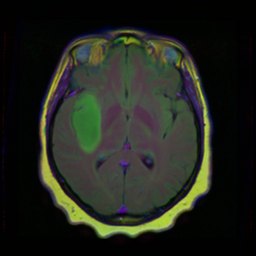

(1, 256, 256)


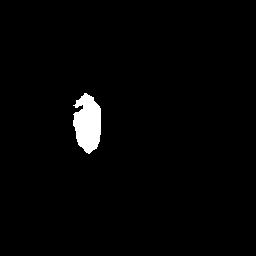

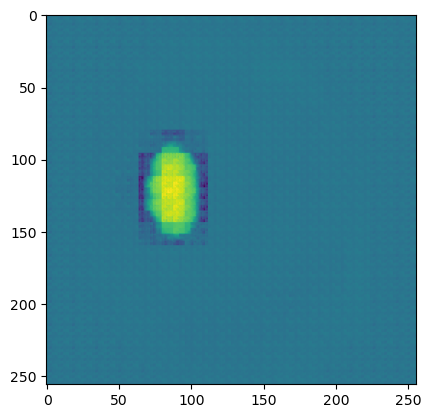

In [63]:
def realCheck():

    path=".\\data\\kaggle_3m\\TCGA_CS_4942_19970222\\TCGA_CS_4942_19970222_10.tif"
    img=Image.open(path)
    display(img)
    tensorImg=transforms(img)
    batchImg=torch.unsqueeze(tensorImg,0)
    batchImg=batchImg.to(device)
    out=model(batchImg).cpu().detach().numpy()
    out=out.squeeze(0)
    print(out.shape)
    # out=out.tolist()
    transform = tv.transforms.ToPILImage()
    
    plt.imshow(out.transpose((1,2,0)))
    path=".\\data\\kaggle_3m\\TCGA_CS_4942_19970222\\TCGA_CS_4942_19970222_10_mask.tif"
    img=Image.open(path)
    display(img)
realCheck()